# **Задание**

***Цель: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.***

Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

# **Этапы работы:**

***1. Преобразуйте данные:***


*   проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
*   закодируйте категориальные переменные числовыми значениями по необходимости.



Для начала подгрузим файл athletes.csv:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics
from matplotlib import pyplot as plt

from numpy import arange

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1-Homework-1-1/main/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Как видно, пропуски есть, сейчас мы их удалим:

In [ ]:
data['dob'].unique()

array(['10/17/69', '9/23/86', '5/27/92', ..., '6/9/93', '2/7/88',
       '4/6/00'], dtype=object)

In [ ]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [ ]:
data['weight'].unique()

array([ 64.,  56.,  79.,  80.,  71.,  67.,  98., 100.,  62.,  54.,  63.,
        66.,  nan,  49.,  68.,  57.,  88.,  65.,  72.,  75.,  70.,  95.,
       120.,  90.,  60.,  73.,  84., 132.,  86.,  77.,  61.,  76.,  52.,
        58.,  81., 115., 130.,  92.,  94.,  93.,  85.,  82.,  55.,  78.,
        83.,  89.,  69.,  87.,  50., 105.,  53.,  47.,  59.,  51., 144.,
        99.,  48.,  44., 125.,  35.,  46.,  74., 113., 102.,  96., 107.,
       110.,  97.,  45.,  91., 138., 136., 149.,  43., 117.,  42., 101.,
       114., 104., 122., 108.,  39., 140.,  37., 118., 135., 106., 170.,
       103., 139., 112., 109., 123.,  34., 128., 155.,  40., 145., 160.,
       127., 163.,  31., 137., 116., 119., 165.,  36., 133., 150., 148.,
       157.,  41., 143., 111., 121., 126., 159., 152., 146., 124., 134.,
       142., 154.,  33.])

In [ ]:
data.dropna(inplace=True)
data.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


Проверяем на пустые значения:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


Теперь пустых значений в data нет

Мы будем по результатам предсказывать пол

In [ ]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

Теперь закодируем категориальные переменные числовыми значениями. Но сделаем это только с полом (sex), национальностью (nationality) и видом спорта (sport)

In [ ]:
data['sex'] = pd.factorize(data['sex'])[ 0 ]

In [ ]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,0,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,1,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,0,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,0,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,0,11/26/90,1.81,71.0,cycling,0,0,0


Для себя я создам новый data и удалю не информативные столбцы: id, name, dob

In [ ]:
data_train = data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  int64  
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1017.9+ KB


In [ ]:
data_train = data_train.drop(['id', 'name', 'dob', 'nationality', 'sport'], axis=1)

In [ ]:
data_train.head()

,sex,height,weight,gold,silver,bronze
0,0,1.72,64.0,0,0,0
1,1,1.68,56.0,0,0,0
2,0,1.98,79.0,0,0,1
3,0,1.83,80.0,0,0,0
4,0,1.81,71.0,0,0,0




---



---



---



***2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.***

In [ ]:
X = data_train[['height', 'weight', 'gold', 'silver', 'bronze']]
y = data_train['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
l_predictions = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.7753899054402554

In [ ]:
model.score(X_test, y_test)

0.7815837937384899



---



---



---



***3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.***

In [ ]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

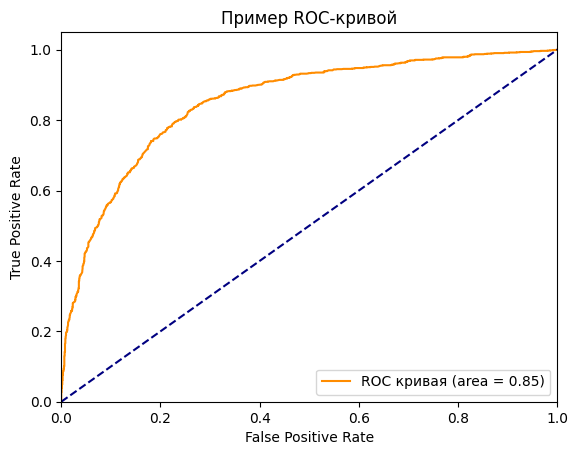

In [ ]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1146,  320],
       [ 273,  976]])

Можно изобразить матрицу графически:

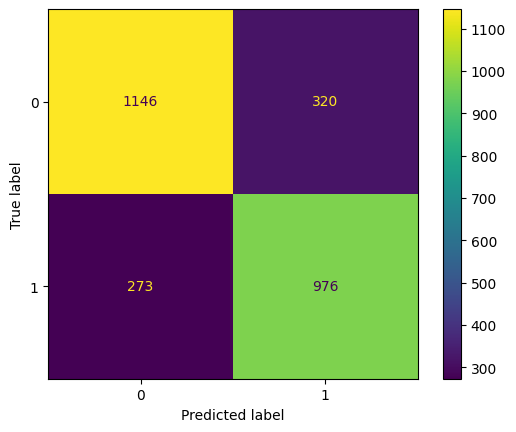

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

Получается, что:

*   True Positive 1146, False Positive 320
*   False Negative 273, True Negative 976





---



---



---



***4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.***

In [ ]:
# метрика accuracy
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f' метрика accuracy  {acc}')

precision_0 = sklearn.metrics.precision_score(y_test, y_pred, pos_label=0)
print(f' precision 0 (male)  {precision_0}')

precision_1 = sklearn.metrics.precision_score(y_test, y_pred, pos_label=1)
print(f' precision 1 (female)  {precision_1}')

recall_0 = sklearn.metrics.recall_score(y_test, y_pred, pos_label=0)
print(f' recall 0 (male)  {recall_0}')

recall_1 = sklearn.metrics.recall_score(y_test, y_pred, pos_label=1)
print(f' recall 1 (female)  {recall_1}')

[0.         0.21828104 1.        ] [0.         0.78142514 1.        ] [2 1 0]
 метрика accuracy  0.7815837937384899
 precision 0 (male)  0.8076109936575053
 precision 1 (female)  0.7530864197530864
 recall 0 (male)  0.781718963165075
 recall 1 (female)  0.7814251401120896




---



---



---



***5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.***

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1146,  320],
       [ 273,  976]])

Как мы уже поняли ранее:

*   True Positive 1146, False Positive 320
*   False Negative 273, True Negative 976

Но мы все таки сделаем это вручную

In [ ]:
thresholds = arange(0, 1, 0.1)


predictions = model.predict_proba(X_test)

fprs = []
tprs = []
prs = []
res = []
pr_custom = []


for threshold in thresholds:
    _tp = 0 # True positive
    _fp = 0 # False positive
    _fn = 0 # False negative
    _tn = 0 # True negative
    for predicted_prob, actual in zip(predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                _tp += 1
            else:
                _fp += 1

        else:
            if actual == 1:
                _fn += 1
            else:
                _tn += 1
    tpr2 = _tp/(_tp + _fn)
    fpr2 = _fp/(_fp + _tn)
    precision = _tp/(_tp + _fp)
    recall = tpr2
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    res.append(recall)

Опробуем все формулы

In [ ]:
acc_manually = ( _tp + _tn ) / ( _tp + _fp + _fn + _tn )
print(f' метрика accuracy посчитанная по формуле {acc_manually}')

precision_0_manually = _tp / ( _tp + _fp )
print(f' precision 0 (male) посчитанная по формуле {precision_0_manually}')

precision_1_manually = _tn / ( _tn + _fn)
print(f' precision 1 (female) посчитанная по формуле {precision_1_manually}')

recall_0_manually = _tp / ( _tp + _fn )
print(f' recall 0 (male) посчитанная по формуле {recall_0_manually}')

recall_1_manually =  _tn / ( _tn + _fp )
print(f' recall 1 (female) посчитанная по формуле {recall_1_manually}')

 метрика accuracy посчитанная по формуле 0.6793738489871086
 precision 0 (male) посчитанная по формуле 0.6355950419144515
 precision 1 (female) посчитанная по формуле 0.7256878647767756
 recall 0 (male) посчитанная по формуле 0.7102481985588471
 recall 1 (female) посчитанная по формуле 0.6530695770804912


In [ ]:
# F-мера

F = (2 * precision_0_manually * recall_0_manually)/(precision_0_manually + recall_0_manually)
F

0.6708511362347337



---



---



---



***6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.***

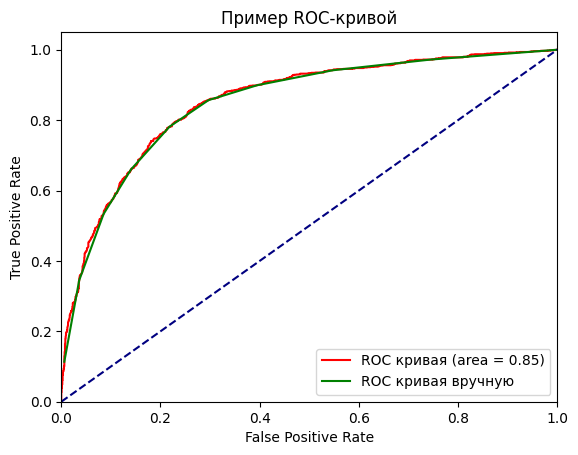

In [ ]:
plt.plot(fpr, tpr, color='red', label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot(fprs, tprs, color='green', label='ROC кривая вручную')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()



---



---



---



***7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.***

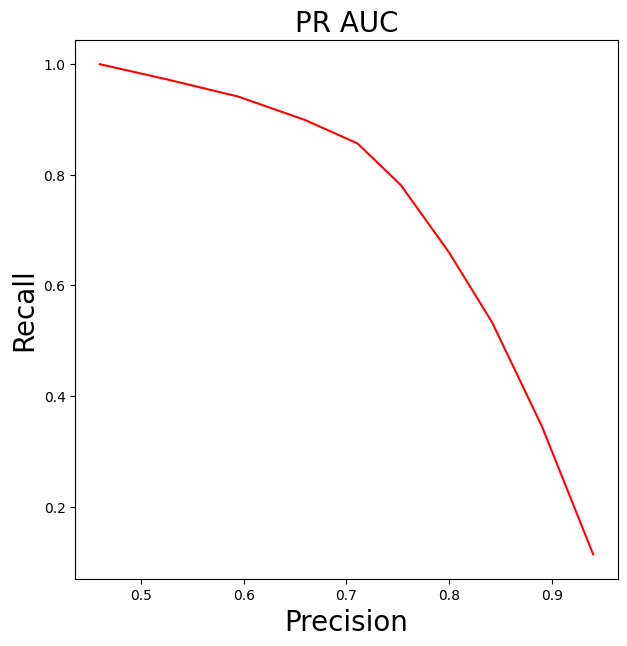

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(prs, res, color="red")

plt.title('PR AUC', fontdict={'fontsize': 20})
plt.xlabel('Precision', fontdict={'fontsize': 20})
plt.ylabel('Recall', fontdict={'fontsize': 20})
plt.show()



---



---



---



***8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.***

***Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).

Отсортируем по возрастанию, чтобы считать от начала кривой

In [ ]:

fprs.sort()
tprs.sort()
# приблизительно моделируем площадь фигуры как сумму фигур по шагам
custom_roc_auc = 0
prev_fpr = 0
prev_tpr = 0
for index in range(len(fprs)):
    if(index != 0):
        custom_roc_auc += ((tprs[index] - prev_tpr) * (fprs[index] - prev_fpr) / 2) + (tprs[index] * (fprs[index] - prev_fpr))
        prev_tpr = tprs[index]
        prev_fpr = fprs[index]
print(custom_roc_auc)

0.9159646953579235




---



---



---



# **Сформулируйте выводы по проделанной работе:**

*   как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

На графике наглядно видно, что они различаются незначительно, но это и понятно - принцип расчета одинаковый.
Подсчет метрики roc_auc_score (ROC AUC=0.853) и метрики "ручной" (приблизительно 0.916) отличаются сильнее, но это связано с неточным подсчетом моей модели (я считаю площади четырехугольников). Возможно, если увеличить число шагов, то точность "ручной" модели вырастет.


*   *может ли ROC-кривая проходить ниже диагонали?*

Может при AUC менее 0,5, но в этом случае "переворачивают" график